# LOGISTIC REGRESSION MODEL TRAINING

# 1. Importing libraries 

In [176]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report

# 2.Problem statement

prediction of MOVIES'STATUSES on release uing ML

# 3.Data gathering

In [131]:
df=pd.read_csv(r"C:\Users\win\Desktop\Dpython\ML\datasets\movies_data.csv")
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


# 4.Exploratory data analysis(EDA)


Check for size

In [95]:
df.shape

(979, 6)

Check for information

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


Statastical information

In [97]:
df.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


Finding out the unique values of columns

In [98]:
df["star_rating"].unique()

array([9.3, 9.2, 9.1, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1,
       8. , 7.9, 7.8, 7.7, 7.6, 7.5, 7.4])

In [99]:
df["genre"].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [100]:
df["content_rating"].unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [101]:
df["star_rating"].replace({'9.3':9,'9.2':9,'9.1':9,'9.':9,'8.9':8,'8.8':8,'8.7':8,'8.6':8,'8.5':8,'8.4':8,'8.3':8,'8.2':8,'8.1':8,'8.':8,'7.9':7,'7.8':7,'7.7':7,'7.6':7,'7.5':7,'7.4':7},inplace=True)

In [102]:
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


Delete using drop()

In [104]:
dfdrop = df.drop(['content_rating','actors_list','title'], axis=1)
dfdrop

,star_rating,genre,duration
0,9.3,Crime,142
1,9.2,Crime,175
2,9.1,Crime,200
3,9.0,Action,152
4,8.9,Crime,154
...,...,...,...
974,7.4,Comedy,116
975,7.4,Adventure,118
976,7.4,Action,138
977,7.4,Horror,114


Rearrange : by getting dataframe column names as a list,rearranging the list the way you want it to be,pass the new list in DataFrame like a key list in a dict

In [107]:
clist= ['genre','duration','star_rating']
dfn=dfdrop[clist]
dfn

,genre,duration,star_rating
0,Crime,142,9.3
1,Crime,175,9.2
2,Crime,200,9.1
3,Action,152,9.0
4,Crime,154,8.9
...,...,...,...
974,Comedy,116,7.4
975,Adventure,118,7.4
976,Action,138,7.4
977,Horror,114,7.4


In [112]:
dfn['movie_rating'] = dfn['star_rating'].astype(int)

C:\Users\win\AppData\Local\Temp\ipykernel_9520\3990143579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['movie_rating'] = dfn['star_rating'].astype(int)


In [113]:
dfn

,genre,duration,star_rating,movie_rating
0,Crime,142,9.3,9
1,Crime,175,9.2,9
2,Crime,200,9.1,9
3,Action,152,9.0,9
4,Crime,154,8.9,8
...,...,...,...,...
974,Comedy,116,7.4,7
975,Adventure,118,7.4,7
976,Action,138,7.4,7
977,Horror,114,7.4,7


In [114]:
del dfn['star_rating']
dfn

,genre,duration,movie_rating
0,Crime,142,9
1,Crime,175,9
2,Crime,200,9
3,Action,152,9
4,Crime,154,8
...,...,...,...
974,Comedy,116,7
975,Adventure,118,7
976,Action,138,7
977,Horror,114,7


Replacing for converting obj to int dt

In [132]:
dfn["genre"].replace({'Crime':1, 'Action':2, 'Drama':3, 'Western':4, 'Adventure':5, 'Biography':6, 'Comedy':7, 'Animation':8, 'Mystery':9, 'Horror':10, 'Film-Noir':11, 'Sci-Fi':12, 'History':13, 'Thriller':14, 'Family':15, 'Fantasy':16},inplace=True)
dfn

C:\Users\win\AppData\Local\Temp\ipykernel_9520\2117725010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn["genre"].replace({'Crime':1, 'Action':2, 'Drama':3, 'Western':4, 'Adventure':5, 'Biography':6, 'Comedy':7, 'Animation':8, 'Mystery':9, 'Horror':10, 'Film-Noir':11, 'Sci-Fi':12, 'History':13, 'Thriller':14, 'Family':15, 'Fantasy':16},inplace=True)


,genre,duration,movie_rating
0,1,142,9
1,1,175,9
2,1,200,9
3,2,152,9
4,1,154,8
...,...,...,...
974,7,116,7
975,5,118,7
976,2,138,7
977,10,114,7


<Axes: xlabel='genre', ylabel='Density'>

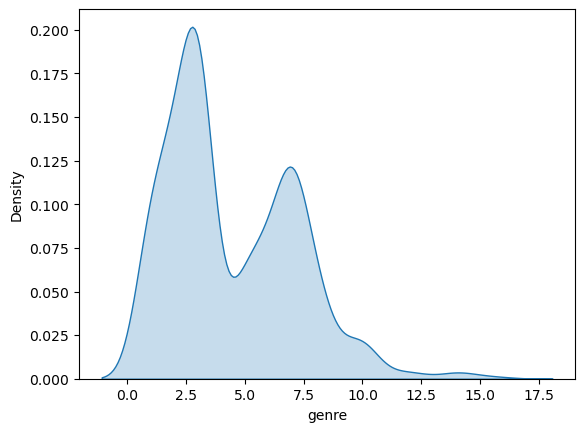

In [116]:
sns.kdeplot(dfn["genre"],fill=True)

<Axes: xlabel='duration', ylabel='Density'>

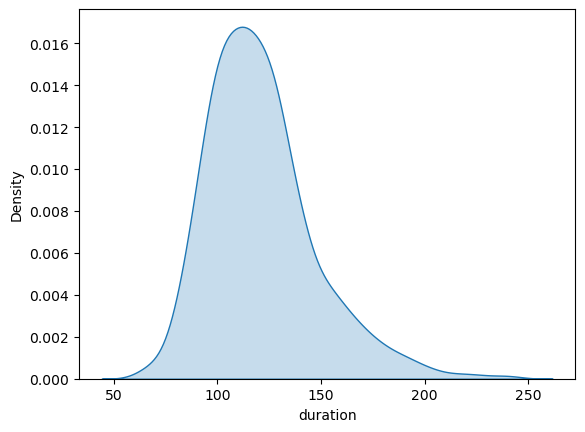

In [117]:
sns.kdeplot(dfn["duration"],fill=True)

" 'Crime':1,'Action':2,'Drama':3,'Western':4,'Adventure':5,'Biography':6,\n    'Comedy':7,'Animation':8,'Mystery':9,'Horror':10,'Film-Noir':11,\n    'Sci-Fi':12,'History':13,'Thriller':14,'Family':15,'Fantasy':16}  "

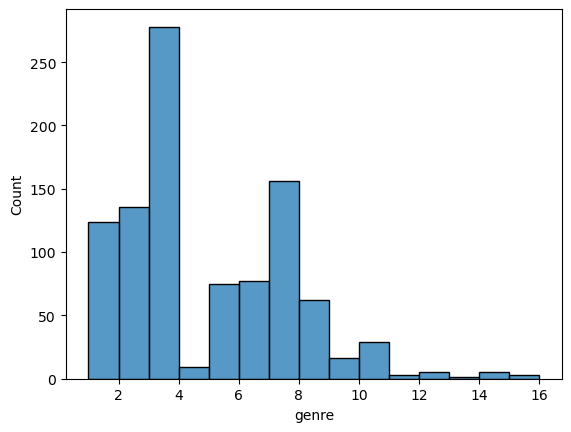

In [120]:
sns.histplot(dfn["genre"])
''' 'Crime':1,'Action':2,'Drama':3,'Western':4,'Adventure':5,'Biography':6,
    'Comedy':7,'Animation':8,'Mystery':9,'Horror':10,'Film-Noir':11,
    'Sci-Fi':12,'History':13,'Thriller':14,'Family':15,'Fantasy':16}  '''

<Axes: xlabel='duration', ylabel='Count'>

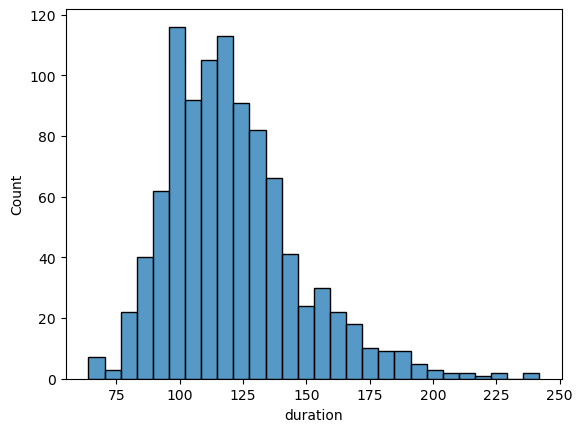

In [119]:
sns.histplot(dfn["duration"])

check for missing values

In [121]:
dfn.isnull().sum()

genre           0
duration        0
movie_rating    0
dtype: int64

check for outliers

<Axes: >

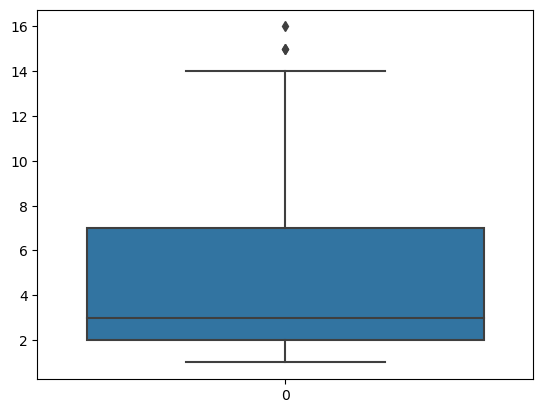

In [133]:
sns.boxplot(dfn["genre"])

In [134]:
q1 = dfn["genre"].quantile(0.25)
q2 = dfn["genre"].quantile(0.50)
q3 = dfn["genre"].quantile(0.75)
iqr=q3-q1

In [135]:
lowertail=q1-1.5*iqr
lowertail

-5.5

In [136]:
uppertail=q3+1.5*iqr
uppertail

14.5

In [139]:
dfn[(dfn["genre"] < lowertail)|(dfn["genre"] > uppertail)]

,genre,duration,movie_rating
468,15,115,7
497,15,100,7
638,16,112,7


<Axes: >

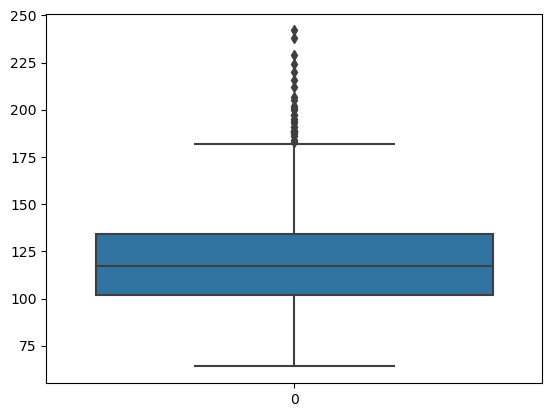

In [123]:
sns.boxplot(dfn["duration"])

In [142]:
q1 = dfn["duration"].quantile(0.25)
q2 = dfn["duration"].quantile(0.50)
q3 = dfn["duration"].quantile(0.75)
iqr=q3-q1

In [143]:
lowertail=q1-1.5*iqr
lowertail

54.0

In [144]:
uppertail=q3+1.5*iqr
uppertail

182.0

In [145]:
dfn[(dfn["duration"]<lowertail)|(dfn["duration"]>uppertail)]

,genre,duration,movie_rating
2,1,200,9
7,5,201,8
8,6,195,8
17,3,207,8
40,1,189,8
78,1,229,8
85,5,216,8
89,3,189,8
109,7,183,8
132,3,186,8


# 5.Feature Engineering 

In [146]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   genre         979 non-null    int64
 1   duration      979 non-null    int64
 2   movie_rating  979 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 19.2 KB


Assumption : No Multicolinearity-----there should not be string correlation between independent variables


In [148]:
vif_df = pd.DataFrame()
df1 = dfn.iloc[:,:2]
vif_df["Independent Variables"] = df1.columns
vif_df

,Independent Variables
0,genre
1,duration


In [149]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list    

[2.7885895866116472, 2.7885895866116472]

In [150]:
vif_df["VIF"] = vif_list

In [151]:
vif_df

,Independent Variables,VIF
0,genre,2.78859
1,duration,2.78859


# Feature Selection

In [152]:
dfn.corr()

,genre,duration,movie_rating
genre,1.000000,-0.269048,-0.041805
duration,-0.269048,1.000000,0.173510
movie_rating,-0.041805,0.173510,1.000000


<Axes: >

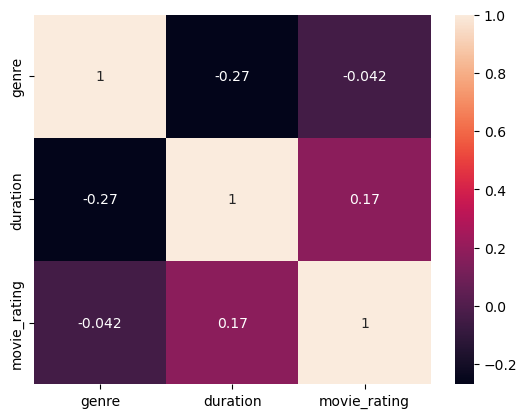

In [155]:
sns.heatmap(dfn.corr(),annot =True)

C:\Users\win\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


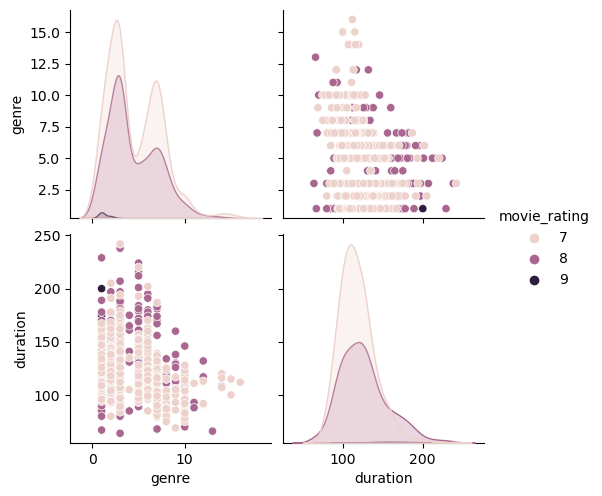

In [156]:
sns.pairplot(dfn,hue="movie_rating")

C:\Users\win\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


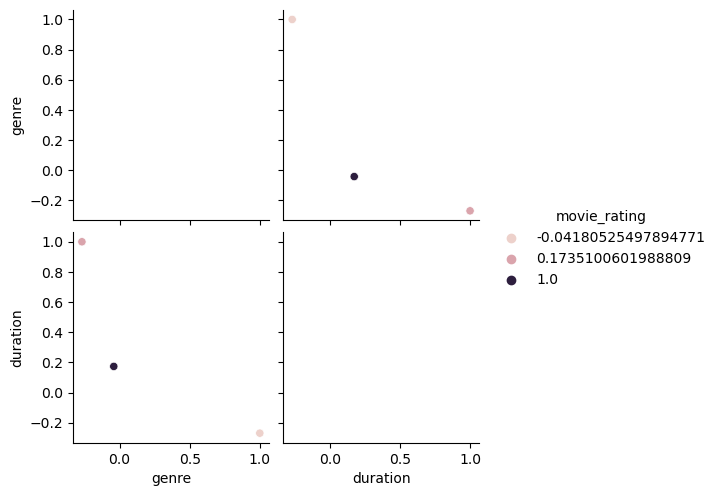

In [158]:
sns.pairplot(dfn.corr(),hue="movie_rating")

In [165]:
x = df1 #independent feature
y = dfn['movie_rating'] #dependent feature/target column

In [169]:
dfn['movie_rating'].value_counts()

movie_rating
7    585
8    390
9      4
Name: count, dtype: int64

<Axes: ylabel='count'>

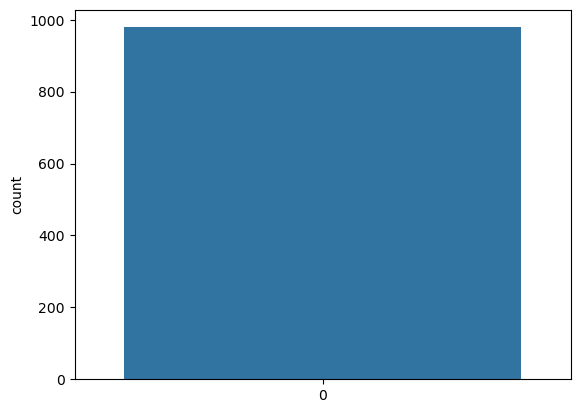

In [170]:
sns.countplot(dfn['movie_rating'])

In [172]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

# Model Training 

In [173]:
log_reg = LogisticRegression(multi_class="ovr") #multi_class="ovr":as it is multiclass 
log_reg

LogisticRegression(multi_class='ovr')

In [174]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression(multi_class='ovr')

# Evaluation

In [177]:
ytrain

592    7
376    8
692    7
387    8
448    7
      ..
806    7
444    7
457    7
967    7
632    7
Name: movie_rating, Length: 783, dtype: int32

In [178]:
ytrain_pred = log_reg_model.predict(xtrain)

In [179]:
ytrain_pred

array([7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 8, 7,
       7, 7, 7, 8, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7,
       8, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7,
       8, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 7, 7, 7,

Evaluation on training data

In [180]:
acc = accuracy_score(ytrain,ytrain_pred)
print("Accuracy : ",acc)
 
print("-"*50)

print(multilabel_confusion_matrix(ytrain,ytrain_pred))
print("-"*50)

clf_rep = classification_report(ytrain,ytrain_pred)
print(clf_rep)

Accuracy :  0.611749680715198
--------------------------------------------------
[[[ 58 270]
  [ 32 423]]

 [[425  34]
  [268  56]]

 [[779   0]
  [  4   0]]]
--------------------------------------------------
              precision    recall  f1-score   support

           7       0.61      0.93      0.74       455
           8       0.62      0.17      0.27       324
           9       0.00      0.00      0.00         4

    accuracy                           0.61       783
   macro avg       0.41      0.37      0.34       783
weighted avg       0.61      0.61      0.54       783



C:\Users\win\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation for testing data

In [181]:
ytest_pred = log_reg_model.predict(xtest)

In [182]:
acc = accuracy_score(ytest,ytest_pred)
print("Accuracy : ", acc)

print("-"*50)

print(multilabel_confusion_matrix(ytest,ytest_pred))
print("_"*50)

clf_rep = classification_report(ytest,ytest_pred)
print(clf_rep)


Accuracy :  0.6632653061224489
--------------------------------------------------
[[[ 14  52]
  [ 13 117]]

 [[117  13]
  [ 53  13]]

 [[195   1]
  [  0   0]]]
__________________________________________________
              precision    recall  f1-score   support

           7       0.69      0.90      0.78       130
           8       0.50      0.20      0.28        66
           9       0.00      0.00      0.00         0

    accuracy                           0.66       196
   macro avg       0.40      0.37      0.36       196
weighted avg       0.63      0.66      0.61       196



C:\Users\win\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Save model into pickle file

In [183]:
import pickle

In [184]:
with open("model.pkl","wb") as f:
    pickle.dump(log_reg_model,f)

Take input from user

In [188]:
def movie_rating_prediction(genre,duration):
    test_df = pd.DataFrame({"genre":[genre],"duration":[duration]})
    
    with open("model.pkl","rb") as f:
        final_model = pickle.load(f)
    
    prediction = final_model.predict(test_df)
    
    print(f"movie_rating : {prediction[0]}")

In [190]:
movie_rating_prediction(2,120)

movie_rating : 7


In [191]:
movie_rating_prediction(6,60)

movie_rating : 7
